Prediction errors of ML models can be decomposed into two components: `Bias` and `Variance`. To understand those edge cases are fundamental for producing resilient and trustworthy models.      


Conceptual Definition.

* Error due to Bias. It is the difference between the expected prediction and the actual values.    
* Error due to Variance. It is the variability for a given data point.

http://scott.fortmann-roe.com/docs/BiasVariance.html

To establish a mathematical notation, the error may then be decomposed into bias and variance components.

$$ Err(x) = E[(Y - \hat{f}(x))^2], $$

$$ Err(x) = (E[\hat{f}(x)] - f(x))^2 + E[(\hat{f}(x) - E[\hat{f}(x)])^2)] + \sigma_e^2 $$

$$ Err(x) = Bias^2 + Variance + Irreducible Error$$

The `Bias` condition is stemmed from a well-known condition of learning inability. In machine learning parlance, underfitting. An under-fitted model entails a situation where despite the covariates, the model does not improve over the null model, which returns the target mean.    
The `Variance` condition happens when the model learns intrinsically onto a slice of data and can not transfer to a different region of data. a.k.a: overfitting. An over-fitted model is not able to generalize on a new piece of data. Variance is a complex equation, that ponders `Model Hyperparameters`, `Data size`, and `Covariates`. We lumpers it into `Model Complexity`.    

A ML pratictioner must to find the sweet spot between those error traits by trading-off them on a cross-validation techique. My favorite beamer tool is the `learning curve`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier


X_raw, y_raw = fetch_openml("miceprotein", version=1, as_frame=True, return_X_y=True)

## filtering and formatting
y_raw = LabelEncoder().fit_transform(y_raw)
X_raw = X_raw[['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N']]

mdl = LGBMClassifier(n_estimators=5)

/home/jean/.cache/pypoetry/virtualenvs/ml-review-GR21w9uC-py3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:937: UserWarning: Version 1 of dataset MiceProtein is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/1804243/MiceProtein.arff
  warn(
/home/jean/.cache/pypoetry/virtualenvs/ml-review-GR21w9uC-py3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X_raw.shape

(1080, 46)

In [3]:
mdl.fit(X_raw, y_raw)

LGBMClassifier(n_estimators=5)

CPU times: user 1.82 s, sys: 180 ms, total: 2 s
Wall time: 54 s


Text(0.5, 1.0, 'Learning Curve')

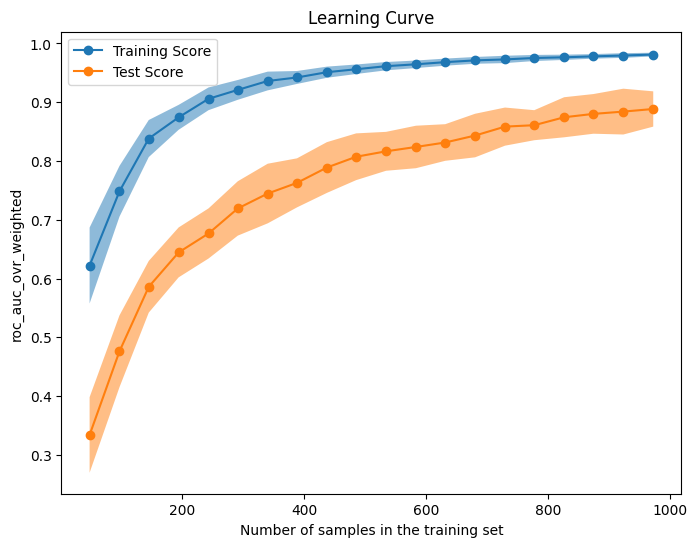

In [4]:
%%time
fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": X_raw,
    "y": y_raw,
    "train_sizes": np.linspace(0.05, 1.0, 20),
    "cv": ShuffleSplit(n_splits=50, test_size=0.1, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "roc_auc_ovr_weighted",
}

LearningCurveDisplay.from_estimator(mdl, **common_params, ax=ax)
ax.legend(["Training Score", "Test Score"])
ax.set_title(f"Learning Curve")

Bias is measured by its ability to discriminate the target throughout fitting time. Variance is measured on the cross-validation dataset. It's easy to behold the influence of sample size on cross-validation score.  



To finish, we review one of the most exciting techniques to control the variance or over-fitting; regularization. Regularization is a quintessential and agnostic solution that can append to most algorithms and works by adding a penalty term to the loss function.  

Regularizations L1 e L2 add absolute and square terms, multiplied by specified term $\lambda$, to the loss function. To portray it in a representative fashion, we peek at Lasso and Ridge Regressions.


`L2/Ridge Regression`    


$$\sum_{n=1}^{M} (y_i - y_i')^2 = \sum_{n=1}^{M}(y_i - X\beta)^2 + \lambda\sum_{j=0}^{n}\beta_j^2 $$


`L1/Lasso Regression`    


$$\sum_{n=1}^{M} (y_i - y_i')^2 = \sum_{n=1}^{M}(y_i - X\beta)^2 + \lambda\sum_{j=0}^{n}|\beta_j| $$

CPU times: user 1.58 s, sys: 167 ms, total: 1.74 s
Wall time: 6min 28s


Text(0.5, 1.0, 'Learning Curve')

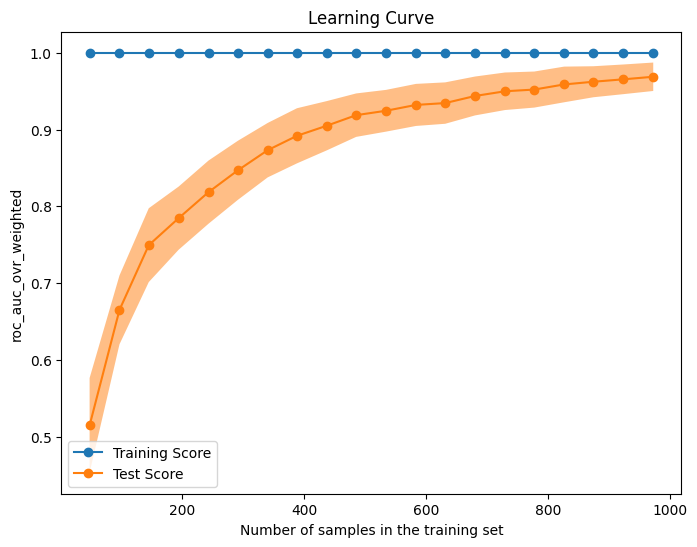

In [5]:
%%time
#L2.
mdl = LGBMClassifier(reg_lambda=0.7)

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": X_raw,
    "y": y_raw,
    "train_sizes": np.linspace(0.05, 1.0, 20),
    "cv": ShuffleSplit(n_splits=50, test_size=0.1, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "roc_auc_ovr_weighted",
}

LearningCurveDisplay.from_estimator(mdl, **common_params, ax=ax)
ax.legend(["Training Score", "Test Score"])
ax.set_title(f"Learning Curve")

CPU times: user 1.27 s, sys: 107 ms, total: 1.37 s
Wall time: 4min 18s


Text(0.5, 1.0, 'Learning Curve')

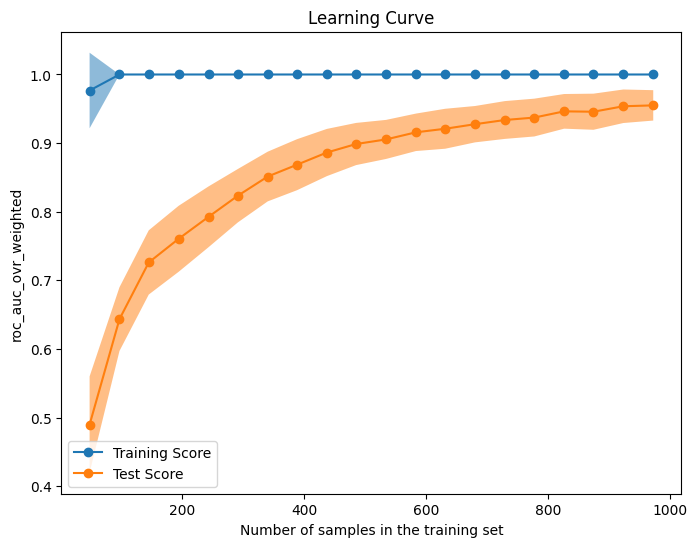

In [6]:
%%time

mdl = LGBMClassifier(reg_alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": X_raw,
    "y": y_raw,
    "train_sizes": np.linspace(0.05, 1.0, 20),
    "cv": ShuffleSplit(n_splits=50, test_size=0.1, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "roc_auc_ovr_weighted",
}

LearningCurveDisplay.from_estimator(mdl, **common_params, ax=ax)
ax.legend(["Training Score", "Test Score"])
ax.set_title(f"Learning Curve")

CPU times: user 1.12 s, sys: 85.6 ms, total: 1.21 s
Wall time: 4min 18s


Text(0.5, 1.0, 'Learning Curve')

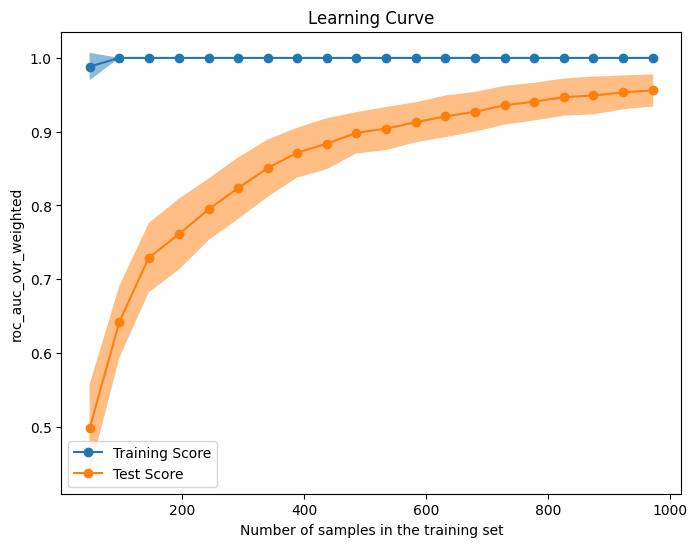

In [7]:
%%time

mdl = LGBMClassifier(reg_alpha=0.7, reg_lambda=0.7)

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": X_raw,
    "y": y_raw,
    "train_sizes": np.linspace(0.05, 1.0, 20),
    "cv": ShuffleSplit(n_splits=50, test_size=0.1, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "roc_auc_ovr_weighted",
}

LearningCurveDisplay.from_estimator(mdl, **common_params, ax=ax)
ax.legend(["Training Score", "Test Score"])
ax.set_title(f"Learning Curve")

Impressive!